In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
%matplotlib notebook

In [2]:
datac = pd.read_csv("covid_19_india.csv")           #reading covid_19_india file

In [3]:
datai = pd.read_csv("IndividualDetails.csv")          #reading IndividualDeatail file

In [4]:
excel_file = pd.ExcelFile("Indian States Population and Area.xlsx")   #reading states and population of india from file
indian_states_df = excel_file.parse('Sheet1')

In [5]:
datac.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [6]:
datac.shape

(9291, 9)

In [7]:
datac.isna().sum()                #cheacking missing values in the data set

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [8]:
datac_latest = datac[datac['Date']=="09/12/20"]       #latest data upto 09/12/2020
datac_latest.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
9256,9257,09/12/20,8:00 AM,Andaman and Nicobar Islands,-,-,4647,61,4778
9257,9258,09/12/20,8:00 AM,Andhra Pradesh,-,-,860368,7042,872839
9258,9259,09/12/20,8:00 AM,Arunachal Pradesh,-,-,15690,55,16437
9259,9260,09/12/20,8:00 AM,Assam,-,-,209447,997,214019
9260,9261,09/12/20,8:00 AM,Bihar,-,-,232563,1300,239322


In [9]:
datac_latest.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
9286,9287,09/12/20,8:00 AM,Telengana,-,-,266120,1480,275261
9287,9288,09/12/20,8:00 AM,Tripura,-,-,32169,373,32945
9288,9289,09/12/20,8:00 AM,Uttarakhand,-,-,72435,1307,79141
9289,9290,09/12/20,8:00 AM,Uttar Pradesh,-,-,528832,7967,558173
9290,9291,09/12/20,8:00 AM,West Bengal,-,-,475425,8820,507995


In [10]:
datac_latest['Confirmed'].sum()            #calculated totaol number of comfirmed cases

9735850

<IPython.core.display.Javascript object>


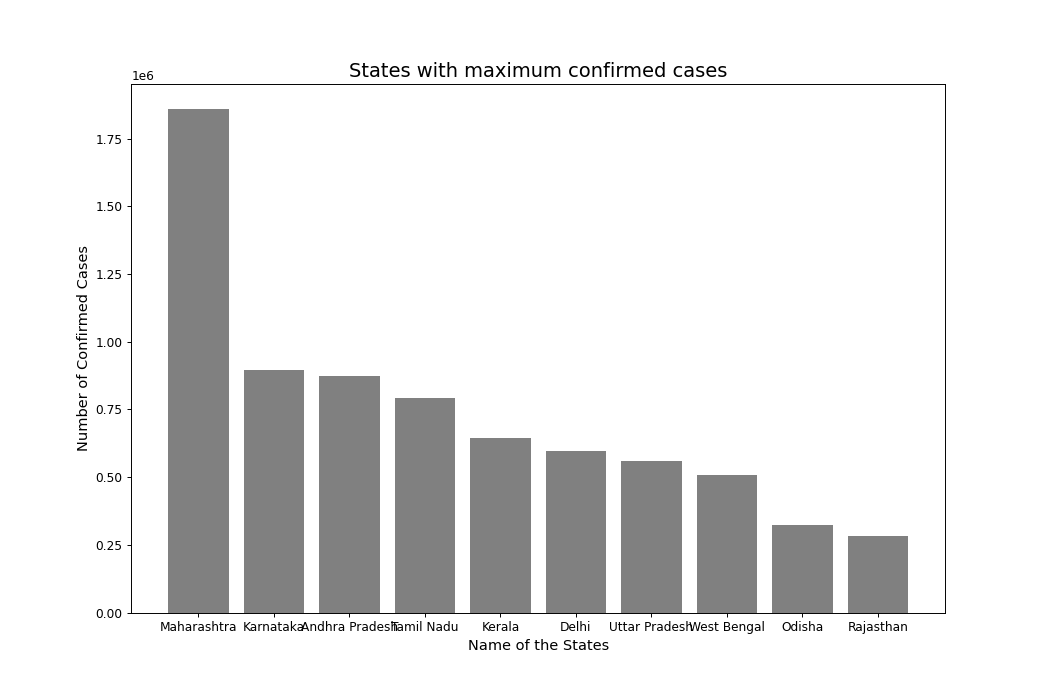

In [11]:
datac_latest = datac_latest.sort_values(by=['Confirmed'], ascending = False)    #bar graph of 10 states with confirmed cases
plt.figure(figsize=(12,8), dpi=70)
plt.bar(datac_latest['State/UnionTerritory'][:10], datac_latest['Confirmed'][:10], align='center',color='grey')
plt.xlabel("Name of the States", size = 12)
plt.ylabel('Number of Confirmed Cases', size = 12)
plt.title('States with maximum confirmed cases', size = 16)
plt.show()

In [12]:
datac_latest['Deaths'].sum()        #total number of deaths

141360

<IPython.core.display.Javascript object>


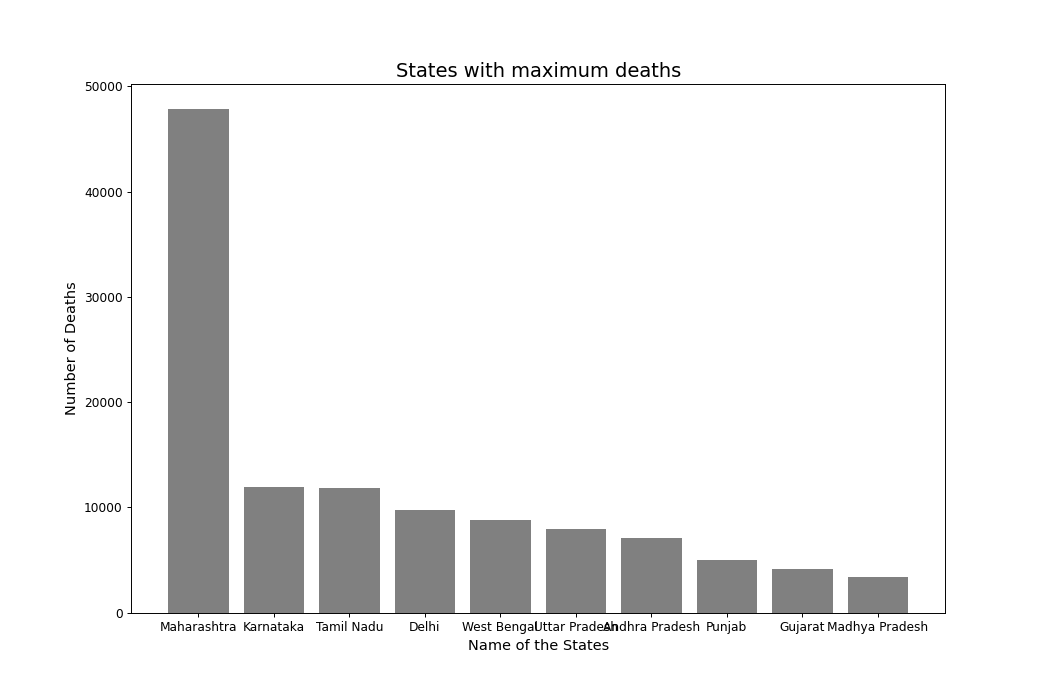

In [13]:
datac_latest = datac_latest.sort_values(by=['Deaths'], ascending = False)   #bar graph representing death cases in states
plt.figure(figsize=(12,8), dpi=70)
plt.bar(datac_latest['State/UnionTerritory'][:10], datac_latest['Deaths'][:10], align='center',color='grey')
plt.xlabel("Name of the States", size = 12)
plt.ylabel('Number of Deaths', size = 12)
plt.title('States with maximum deaths', size = 16)
plt.show()

In [14]:
#calculating ratio of death/comformed cases
datac_latest['Deaths/Confirmed Cases']=(datac_latest['Confirmed']/datac_latest['Deaths']).round()
datac_latest['Deaths/Confirmed Cases']=[np.nan if x == float("inf") else x for x in datac_latest['Deaths/Confirmed Cases']]
datac_latest = datac_latest.sort_values(by=['Deaths/Confirmed Cases'], ascending=True)
datac_latest.iloc[:]

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Deaths/Confirmed Cases
9282,9283,09/12/20,8:00 AM,Punjab,-,-,145093,4964,157331,32.0
9275,9276,09/12/20,8:00 AM,Maharashtra,-,-,1737080,47827,1859367,39.0
9284,9285,09/12/20,8:00 AM,Sikkim,-,-,4735,117,5215,45.0
9266,9267,09/12/20,8:00 AM,Gujarat,-,-,203111,4110,221493,54.0
9290,9291,09/12/20,8:00 AM,West Bengal,-,-,475425,8820,507995,58.0
9281,9282,09/12/20,8:00 AM,Puducherry,-,-,36308,615,37311,61.0
9268,9269,09/12/20,8:00 AM,Himachal Pradesh,-,-,37871,753,46201,61.0
9288,9289,09/12/20,8:00 AM,Uttarakhand,-,-,72435,1307,79141,61.0
9264,9265,09/12/20,8:00 AM,Delhi,-,-,565039,9763,597112,61.0
9261,9262,09/12/20,8:00 AM,Chandigarh,-,-,16981,296,18239,62.0


In [15]:
indian_states_df.head(40)         

,State,Aadhaar assigned as of 2019,Area (per sq km)
0,Delhi,21763471,1483
1,Haryana,28941133,44212
2,Kerala,36475649,38852
3,Himachal Pradesh,7560770,55673
4,Punjab,30355185,50362
5,Goa,1587012,3702
6,Telengana,39184011,112077
7,Uttarakhand,11082791,53483
8,Chandigarh,1131522,114
9,Lakshadweep,70374,30


In [16]:
#dropping 5 columns which are unnecessary
datac_latest = datac_latest.drop(['Sno','Date','Time','ConfirmedIndianNational','ConfirmedForeignNational'], axis = 1)
datac_latest.shape

(35, 5)

In [17]:
#dropping Aadhaar assigned as of 2019 and area of a state
indian_states_df = indian_states_df[['State', 'Aadhaar assigned as of 2019']]
indian_states_df.columns = ['State/UnionTerritory', 'Population']
indian_states_df.head(40)

,State/UnionTerritory,Population
0,Delhi,21763471
1,Haryana,28941133
2,Kerala,36475649
3,Himachal Pradesh,7560770
4,Punjab,30355185
5,Goa,1587012
6,Telengana,39184011
7,Uttarakhand,11082791
8,Chandigarh,1131522
9,Lakshadweep,70374


In [18]:
#merging two datasets i.e. covid_19 latest and india_states_df
datac_latest = pd.merge(datac_latest, indian_states_df, on="State/UnionTerritory")
datac_latest['Cases/10million'] = (datac_latest['Confirmed']/datac_latest['Population'])*10000000
datac_latest.head(37)

,State/UnionTerritory,Cured,Deaths,Confirmed,Deaths/Confirmed Cases,Population,Cases/10million
0,Punjab,145093,4964,157331,32.0,30355185,51830.025085
1,Maharashtra,1737080,47827,1859367,39.0,114063427,163011.672444
2,Sikkim,4735,117,5215,45.0,578914,90082.464753
3,Gujarat,203111,4110,221493,54.0,62097024,35668.859107
4,West Bengal,475425,8820,507995,58.0,91928327,55259.898290
5,Puducherry,36308,615,37311,61.0,1286189,290089.559155
6,Himachal Pradesh,37871,753,46201,61.0,7560770,61106.210082
7,Uttarakhand,72435,1307,79141,61.0,11082791,71408.907738
8,Delhi,565039,9763,597112,61.0,21763471,274364.323595
9,Chandigarh,16981,296,18239,62.0,1131522,161189.972444


In [19]:
#arranging in ascending order cases/10million
datac_latest.fillna(0, inplace=True)
datac_latest.sort_values(by='Cases/10million', ascending=False)

,State/UnionTerritory,Cured,Deaths,Confirmed,Deaths/Confirmed Cases,Population,Cases/10million
14,Ladakh,8056,122,8969,74.0,210156,426778.202859
28,Assam,209447,997,214019,215.0,6755448,316809.484730
12,Goa,46924,701,48935,70.0,1587012,308346.754782
5,Puducherry,36308,615,37311,61.0,1286189,290089.559155
8,Delhi,565039,9763,597112,61.0,21763471,274364.323595
23,Andhra Pradesh,860368,7042,872839,124.0,49145456,177603.194892
29,Kerala,582351,2472,644696,261.0,36475649,176746.957950
1,Maharashtra,1737080,47827,1859367,39.0,114063427,163011.672444
9,Chandigarh,16981,296,18239,62.0,1131522,161189.972444
15,Karnataka,858370,11880,895284,75.0,62462743,143330.881258


<IPython.core.display.Javascript object>


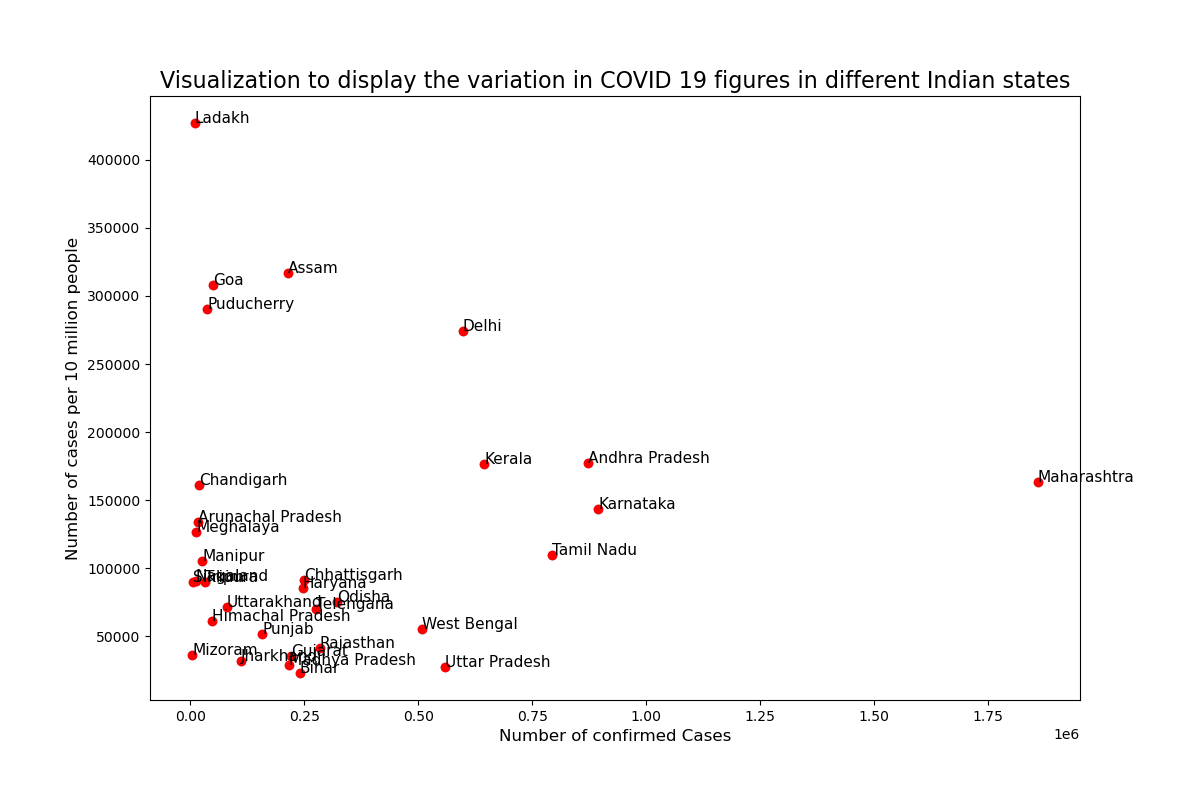

In [20]:
#Visualization to display the variation in COVID 19 figures in different Indian states
data = datac_latest[(datac_latest['Confirmed']>=1000) | (datac_latest['Cases/10million']>=200)]
plt.figure(figsize=(12,8), dpi=80)
plt.scatter(datac_latest['Confirmed'], datac_latest['Cases/10million'], alpha=0.5)
plt.xlabel('Number of confirmed Cases', size=12)
plt.ylabel('Number of cases per 10 million people', size=12)
plt.scatter(data['Confirmed'], data['Cases/10million'], color="red")
for i in range(data.shape[0]):
    plt.annotate(data['State/UnionTerritory'].tolist()[i], xy=(data['Confirmed'].tolist()[i], data['Cases/10million']
            .tolist()[i]),xytext = (data['Confirmed'].tolist()[i]+1.0, data['Cases/10million'].tolist()[i]+12.0), size=11)
#plt.tight_layout()    
plt.title('Visualization to display the variation in COVID 19 figures in different Indian states', size=16)
plt.show()

<IPython.core.display.Javascript object>


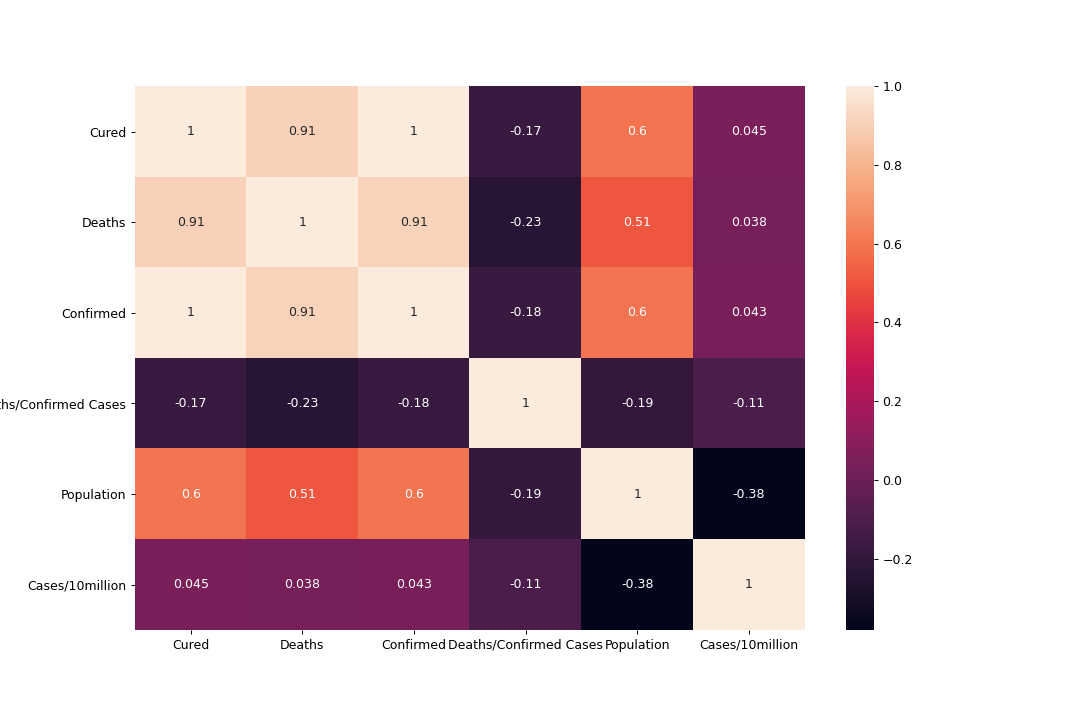

In [21]:
plt.figure(figsize = (12,8))        #heat map of correlations
sns.heatmap(datac_latest.corr(), annot=True)

# Analysis of IndivudualDeatails dataset

In [22]:
datai.isna().sum()

id                        0
government_id         15514
diagnosed_date            0
age                   16332
gender                14148
detected_city         15869
detected_district      3358
detected_state            0
nationality           16424
status_change_date      110
notes                  1318
dtype: int64

In [23]:
datai.iloc[0]

id                                       0
government_id                     KL-TS-P1
diagnosed_date                  30/01/2020
age                                     20
gender                                   F
detected_city                     Thrissur
detected_district                 Thrissur
detected_state                      Kerala
nationality                          India
status_change_date              14/02/2020
notes                 Travelled from Wuhan
Name: 0, dtype: object

In [24]:
#groupping the individual data in terms of district where the case was found
grouped_district = datai.groupby('detected_district')
grouped_district = grouped_district['id']
grouped_district.columns = ['count']
grouped_district.count().sort_values(ascending=False).head(37)

detected_district
Mumbai                 2268
Ahmadabad              1192
Indore                  841
Pune                    591
Jaipur                  578
Hyderabad               486
Thane                   341
Chennai                 290
Surat                   244
Agra                    242
Jodhpur                 234
Bhopal                  197
Vadodara                181
Kurnool                 174
Kasaragod               169
Lucknow                 162
Guntur                  148
Coimbatore              133
Tiruppur                108
Bharatpur               102
Kota                    102
Bengaluru               100
Tonk                     95
Gautam Buddha Nagar      95
Kannur                   92
Bandipore                91
Mysuru                   84
Palghar                  83
Krishna                  80
Srinagar                 79
Meerut                   74
Dindigul                 74
Saharanpur               72
Erode                    70
S.P.S. Nellore           68
Ti

<IPython.core.display.Javascript object>


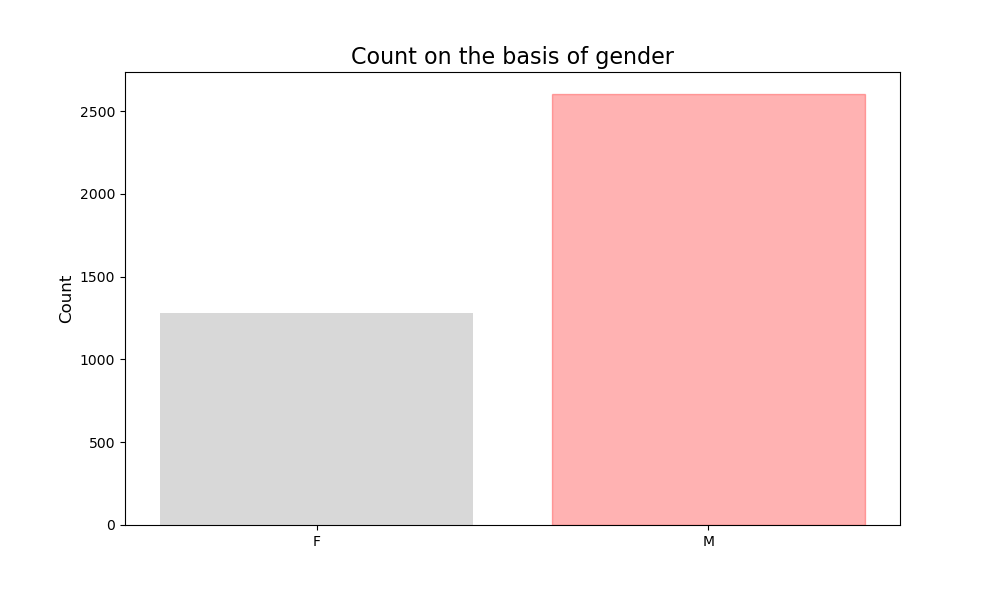

In [25]:
#confirmed cases count on the basis of gender
grouped_gender = datai.groupby('gender')
grouped_gender = pd.DataFrame(grouped_gender.size().reset_index(name = "count"))
grouped_gender.head()
plt.figure(figsize=(10,6), dpi=80)
barlist = plt.bar(grouped_gender['gender'], grouped_gender['count'], align = 'center', color='grey', alpha=0.3)
barlist[1].set_color('r')
plt.ylabel('Count', size=12)
plt.title('Count on the basis of gender', size=16)
plt.show()

In [26]:
#groupping the data on the basis of the diagnosed data to count of number of cases detected each day by doing a 
#cumulative sum of this feature and adding it to a new column 
grouped_date = datai.groupby('diagnosed_date')
grouped_date = pd.DataFrame(grouped_date.size().reset_index(name = "count"))
grouped_date[['Day','Month','Year']] = grouped_date.diagnosed_date.apply(lambda x: pd.Series(str(x).split("/")))
grouped_date.sort_values(by=['Year','Month','Day'], inplace = True, ascending = True)
grouped_date.reset_index(inplace = True)
grouped_date['Cumulative Count'] = grouped_date['count'].cumsum()
grouped_date = grouped_date.drop(['index', 'Day', 'Month', 'Year'], axis = 1)
grouped_date.head(53)

,diagnosed_date,count,Cumulative Count
0,30/01/2020,1,1
1,02/02/2020,1,2
2,03/02/2020,1,3
3,02/03/2020,2,5
4,03/03/2020,1,6
5,04/03/2020,22,28
6,05/03/2020,2,30
7,06/03/2020,1,31
8,07/03/2020,3,34
9,08/03/2020,5,39


<IPython.core.display.Javascript object>


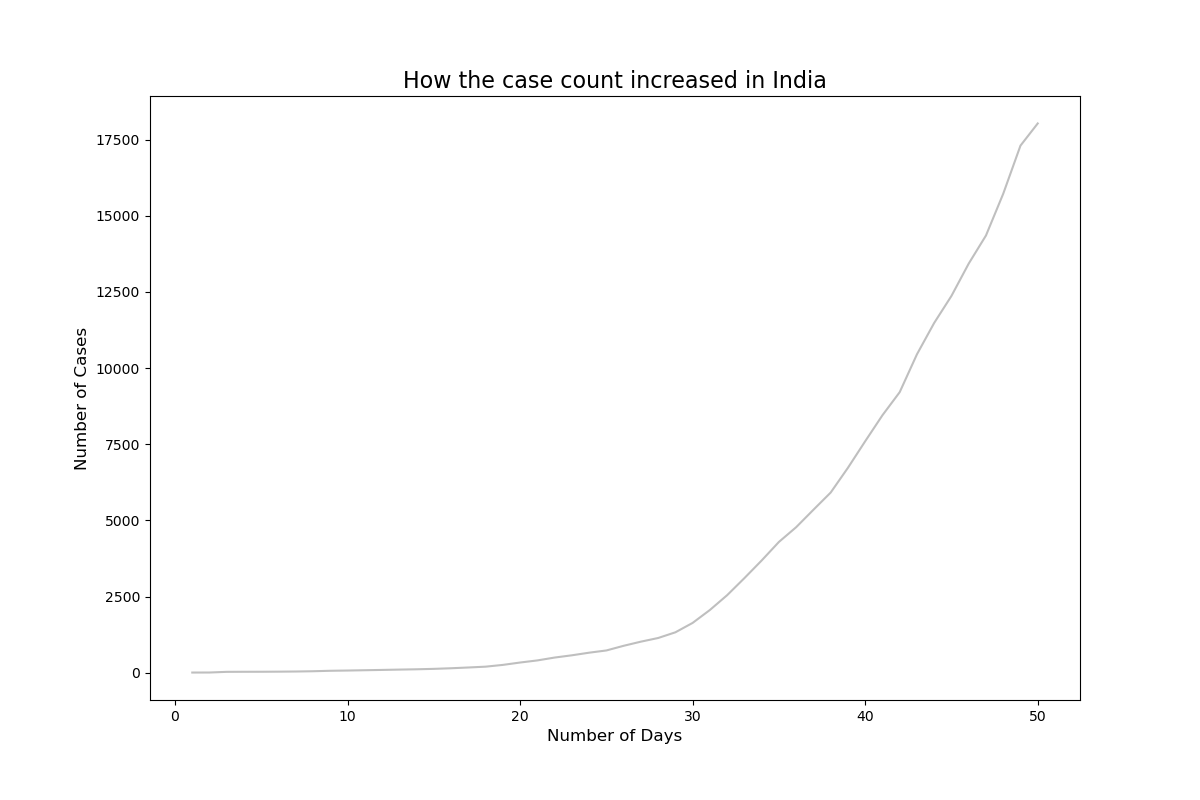

In [27]:
#Ploting graph to see the count increased
grouped_date = grouped_date.iloc[3:]
grouped_date.reset_index(inplace = True)
grouped_date.columns = ['Day Number', 'diagnosed_date', 'count', 'Cumulative Count']
grouped_date['Day Number'] = grouped_date['Day Number'] - 2
grouped_date
plt.figure(figsize=(12,8), dpi=80)
plt.plot(grouped_date['Day Number'], grouped_date['Cumulative Count'], color="grey", alpha = 0.5)
plt.xlabel('Number of Days', size = 12)
plt.ylabel('Number of Cases', size = 12)
plt.title('How the case count increased in India', size=16)
plt.show()

# processing the dataset to group the data in terms of different states

# Maharastra

In [28]:
datac_maharashtra = datac[datac['State/UnionTerritory'] == "Maharashtra"]
datac_maharashtra.head()
datac_maharashtra.reset_index(inplace = True)
datac_maharashtra = datac_maharashtra.drop(['index', 'Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational',
                                            'Cured'],  axis = 1)
datac_maharashtra.reset_index(inplace = True)
datac_maharashtra.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
datac_maharashtra['Day Count'] = datac_maharashtra['Day Count'] + 8
missing_values = pd.DataFrame({"Day Count": [x for x in range(1,8)],
                  "Date": ["0"+str(x)+"/03/20" for x in range(2,9)],
                  "State/UnionTerritory": ["Maharashtra"]*7,
                  "Deaths": [0]*7,
                  "Confirmed": [0]*7})
datac_maharashtra = datac_maharashtra.append(missing_values, ignore_index = True)
datac_maharashtra = datac_maharashtra.sort_values(by="Day Count", ascending = True)
datac_maharashtra.reset_index(drop=True, inplace=True)
print(datac_maharashtra.shape)
datac_maharashtra.head()

(282, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Maharashtra,0,0
1,2,03/03/20,Maharashtra,0,0
2,3,04/03/20,Maharashtra,0,0
3,4,05/03/20,Maharashtra,0,0
4,5,06/03/20,Maharashtra,0,0


In [29]:
datac_maharashtra.tail()

,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
277,278,05/12/20,Maharashtra,47599,1842587
278,279,06/12/20,Maharashtra,47694,1847509
279,280,07/12/20,Maharashtra,47734,1852266
280,281,08/12/20,Maharashtra,47774,1855341
281,282,09/12/20,Maharashtra,47827,1859367


# kerala

In [30]:
datac_kerala = datac[datac['State/UnionTerritory'] == "Kerala"]
datac_kerala = datac_kerala.iloc[32:]
datac_kerala.reset_index(inplace = True)
datac_kerala = datac_kerala.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], 
                                 axis = 1)
datac_kerala.reset_index(inplace = True)
datac_kerala.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
datac_kerala['Day Count'] = datac_kerala['Day Count'] + 1
print(datac_kerala.shape)
datac_kerala.head()

(283, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Kerala,0,3
1,2,03/03/20,Kerala,0,3
2,3,04/03/20,Kerala,0,3
3,4,05/03/20,Kerala,0,3
4,5,06/03/20,Kerala,0,3


In [31]:
datac_kerala.tail()

,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
278,279,05/12/20,Kerala,2358,625767
279,280,06/12/20,Kerala,2390,631615
280,281,07/12/20,Kerala,2418,636392
281,282,08/12/20,Kerala,2441,639664
282,283,09/12/20,Kerala,2472,644696


# Delhi

In [32]:
datac_delhi = datac[datac['State/UnionTerritory'] == 'Delhi']
datac_delhi.reset_index(inplace = True)
datac_delhi = datac_delhi.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], 
                               axis = 1)
datac_delhi.reset_index(inplace = True)
datac_delhi.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
datac_delhi['Day Count'] = datac_delhi['Day Count'] + 1
print(datac_delhi.shape)
datac_delhi.head()

(283, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Delhi,0,1
1,2,03/03/20,Delhi,0,1
2,3,04/03/20,Delhi,0,1
3,4,05/03/20,Delhi,0,2
4,5,06/03/20,Delhi,0,3


In [33]:
datac_delhi.tail()

,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
278,279,05/12/20,Delhi,9497,586125
279,280,06/12/20,Delhi,9574,589544
280,281,07/12/20,Delhi,9643,592250
281,282,08/12/20,Delhi,9706,593924
282,283,09/12/20,Delhi,9763,597112


# Rajasthan

In [34]:
datac_rajasthan = datac[datac['State/UnionTerritory'] == "Rajasthan"]
datac_rajasthan.reset_index(inplace = True)
datac_rajasthan = datac_rajasthan.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational',
                                        'Cured'], axis = 1)
datac_rajasthan.reset_index(inplace = True)
datac_rajasthan.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
datac_rajasthan['Day Count'] = datac_rajasthan['Day Count'] + 2
missing_values = pd.DataFrame({"Day Count": [1],
                           "Date": ["02/03/20"],
                           "State/UnionTerritory": ["Rajasthan"],
                           "Deaths": [0],
                           "Confirmed": [0]})
datac_rajasthan = datac_rajasthan.append(missing_values, ignore_index = True)
datac_rajasthan = datac_rajasthan.sort_values(by="Day Count", ascending = True)
datac_rajasthan.reset_index(drop=True, inplace=True)
print(datac_rajasthan.shape)
datac_rajasthan.head()

(283, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Rajasthan,0,0
1,2,03/03/20,Rajasthan,0,1
2,3,04/03/20,Rajasthan,0,15
3,4,05/03/20,Rajasthan,0,15
4,5,06/03/20,Rajasthan,0,15


In [35]:
datac_rajasthan.tail()

,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
278,279,05/12/20,Rajasthan,2389,276420
279,280,06/12/20,Rajasthan,2409,278496
280,281,07/12/20,Rajasthan,2429,280585
281,282,08/12/20,Rajasthan,2448,282512
282,283,09/12/20,Rajasthan,2468,284116


# Gujarat

In [36]:
datac_gujarat = datac[datac['State/UnionTerritory'] == "Gujarat"]
datac_gujarat.reset_index(inplace = True)
datac_gujarat = datac_gujarat.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational',
                                    'Cured'], axis = 1)
datac_gujarat.reset_index(inplace = True)
datac_gujarat.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
datac_gujarat['Day Count'] = datac_gujarat['Day Count'] + 19
missing_values = pd.DataFrame({"Day Count": [x for x in range(1,19)],
                           "Date": [("0" + str(x) if x < 10 else str(x))+"/03/20" for x in range(2,20)],
                           "State/UnionTerritory": ["Gujarat"]*18,
                           "Deaths": [0]*18,
                           "Confirmed": [0]*18})
datac_gujarat = datac_gujarat.append(missing_values, ignore_index = True)
datac_gujarat = datac_gujarat.sort_values(by="Day Count", ascending = True)
datac_gujarat.reset_index(drop=True, inplace=True)
print(datac_gujarat.shape)
datac_gujarat.head()

(283, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Gujarat,0,0
1,2,03/03/20,Gujarat,0,0
2,3,04/03/20,Gujarat,0,0
3,4,05/03/20,Gujarat,0,0
4,5,06/03/20,Gujarat,0,0


In [37]:
datac_gujarat.tail()

,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
278,279,05/12/20,Gujarat,4049,215819
279,280,06/12/20,Gujarat,4064,217333
280,281,07/12/20,Gujarat,4081,218788
281,282,08/12/20,Gujarat,4095,220168
282,283,09/12/20,Gujarat,4110,221493


# Karnataka

In [38]:
datac_karnataka = datac[datac['State/UnionTerritory'] == "Karnataka"]
datac_karnataka.head()
datac_karnataka.reset_index(inplace = True)
datac_karnataka = datac_karnataka.drop(['index', 'Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational',
                                        'Cured'], axis = 1)
datac_karnataka.reset_index(inplace = True)
datac_karnataka.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
datac_karnataka['Day Count'] = datac_karnataka['Day Count'] + 8
missing_values = pd.DataFrame({"Day Count": [x for x in range(1,8)],
                  "Date": ["0"+str(x)+"/03/20" for x in range(2,9)],
                  "State/UnionTerritory": ["Karnataka"]*7,
                  "Deaths": [0]*7,
                  "Confirmed": [0]*7})
datac_karnataka = datac_karnataka.append(missing_values, ignore_index = True)
datac_karnataka = datac_karnataka.sort_values(by="Day Count", ascending = True)
datac_karnataka.reset_index(drop=True, inplace=True)
print(datac_karnataka.shape)
datac_karnataka.head()

(283, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Karnataka,0,0
1,2,03/03/20,Karnataka,0,0
2,3,04/03/20,Karnataka,0,0
3,4,05/03/20,Karnataka,0,0
4,5,06/03/20,Karnataka,0,0


In [39]:
datac_karnataka.tail()

,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
278,279,05/12/20,Karnataka,11834,890360
279,280,06/12/20,Karnataka,11846,891685
280,281,07/12/20,Karnataka,11856,893006
281,282,08/12/20,Karnataka,11867,894004
282,283,09/12/20,Karnataka,11880,895284


# Andra Pradesh

In [40]:
datac_ap = datac[datac['State/UnionTerritory'] == "Andhra Pradesh"]
datac_ap.head()
datac_ap.reset_index(inplace = True)
datac_ap = datac_ap.drop(['index', 'Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], 
                         axis = 1)
datac_ap.reset_index(inplace = True)
datac_ap.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
datac_ap['Day Count'] = datac_ap['Day Count'] + 8
missing_values = pd.DataFrame({"Day Count": [x for x in range(1,8)],
                  "Date": ["0"+str(x)+"/03/20" for x in range(2,9)],
                  "State/UnionTerritory": ["Andhra Pradesh"]*7,
                  "Deaths": [0]*7,
                  "Confirmed": [0]*7})
datac_ap = datac_ap.append(missing_values, ignore_index = True)
datac_ap = datac_ap.sort_values(by="Day Count", ascending = True)
datac_ap.reset_index(drop=True, inplace=True)
print(datac_ap.shape)
datac_ap.head()

(280, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Andhra Pradesh,0,0
1,2,03/03/20,Andhra Pradesh,0,0
2,3,04/03/20,Andhra Pradesh,0,0
3,4,05/03/20,Andhra Pradesh,0,0
4,5,06/03/20,Andhra Pradesh,0,0


In [41]:
datac_ap.tail()

,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
275,276,05/12/20,Andhra Pradesh,7020,870675
276,277,06/12/20,Andhra Pradesh,7024,871305
277,278,07/12/20,Andhra Pradesh,7033,871972
278,279,08/12/20,Andhra Pradesh,7038,872288
279,280,09/12/20,Andhra Pradesh,7042,872839


# Tamil Nadu

In [42]:
datac_tn = datac[datac['State/UnionTerritory'] == "Tamil Nadu"]
datac_tn.head()
datac_tn.reset_index(inplace = True)
datac_tn = datac_tn.drop(['index', 'Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'],
                         axis = 1)
datac_tn.reset_index(inplace = True)
datac_tn.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
datac_tn['Day Count'] = datac_ap['Day Count'] + 8
missing_values = pd.DataFrame({"Day Count": [x for x in range(1,8)],
                  "Date": ["0"+str(x)+"/03/20" for x in range(2,9)],
                  "State/UnionTerritory": ["Tamil Nadu"]*7,
                  "Deaths": [0]*7,
                  "Confirmed": [0]*7})
datac_tn = datac_tn.append(missing_values, ignore_index = True)
datac_tn = datac_tn.sort_values(by="Day Count", ascending = True)
datac_tn.reset_index(drop=True, inplace=True)
print(datac_tn.shape)
datac_tn.head()

(285, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Tamil Nadu,0,0
1,2,03/03/20,Tamil Nadu,0,0
2,3,04/03/20,Tamil Nadu,0,0
3,4,05/03/20,Tamil Nadu,0,0
4,5,06/03/20,Tamil Nadu,0,0


In [43]:
datac_tn.tail()

,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
280,282,05/12/20,Tamil Nadu,11762,787554
281,283,06/12/20,Tamil Nadu,11777,788920
282,284,07/12/20,Tamil Nadu,11793,790240
283,285,08/12/20,Tamil Nadu,11809,791552
284,286,09/12/20,Tamil Nadu,11822,792788


# Uttar Pradesh

In [44]:
datac_up = datac[datac['State/UnionTerritory'] == "Uttar Pradesh"]
datac_up.head()
datac_up.reset_index(inplace = True)
datac_up = datac_up.drop(['index', 'Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'],  
                         axis = 1)
datac_up.reset_index(inplace = True)
datac_up.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
datac_up['Day Count'] = datac_up['Day Count'] + 8
missing_values = pd.DataFrame({"Day Count": [x for x in range(1,8)],
                  "Date": ["0"+str(x)+"/03/20" for x in range(2,9)],
                  "State/UnionTerritory": ["Uttar Pradesh"]*7,
                  "Deaths": [0]*7,
                  "Confirmed": [0]*7})
datac_up = datac_up.append(missing_values, ignore_index = True)
datac_up = datac_up.sort_values(by="Day Count", ascending = True)
datac_up.reset_index(drop=True, inplace=True)
print(datac_up.shape)
datac_up.head()

(288, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Uttar Pradesh,0,0
1,2,03/03/20,Uttar Pradesh,0,0
2,3,04/03/20,Uttar Pradesh,0,0
3,4,05/03/20,Uttar Pradesh,0,0
4,5,06/03/20,Uttar Pradesh,0,0


In [45]:
datac_up.tail()

,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
283,284,05/12/20,Uttar Pradesh,7877,551179
284,285,06/12/20,Uttar Pradesh,7900,553012
285,286,07/12/20,Uttar Pradesh,7924,554944
286,287,08/12/20,Uttar Pradesh,7944,556397
287,288,09/12/20,Uttar Pradesh,7967,558173


# West Bengal

In [46]:
datac_wb = datac[datac['State/UnionTerritory'] == "West Bengal"]
datac_wb.head()
datac_wb.reset_index(inplace = True)
datac_wb = datac_wb.drop(['index', 'Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], 
                         axis = 1)
datac_wb.reset_index(inplace = True)
datac_wb.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
datac_wb['Day Count'] = datac_wb['Day Count'] + 8
missing_values = pd.DataFrame({"Day Count": [x for x in range(1,8)],
                  "Date": ["0"+str(x)+"/03/20" for x in range(2,9)],
                  "State/UnionTerritory": ["West Bengal"]*7,
                  "Deaths": [0]*7,
                  "Confirmed": [0]*7})
datac_wb = datac_wb.append(missing_values, ignore_index = True)
datac_wb = datac_wb.sort_values(by="Day Count", ascending = True)
datac_wb.reset_index(drop=True, inplace=True)
print(datac_wb.shape)
datac_wb.head()

(274, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,West Bengal,0,0
1,2,03/03/20,West Bengal,0,0
2,3,04/03/20,West Bengal,0,0
3,4,05/03/20,West Bengal,0,0
4,5,06/03/20,West Bengal,0,0


In [47]:
datac_wb.tail()

,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
269,270,05/12/20,West Bengal,8628,496522
270,271,06/12/20,West Bengal,8677,499697
271,272,07/12/20,West Bengal,8723,502840
272,273,08/12/20,West Bengal,8771,505054
273,274,09/12/20,West Bengal,8820,507995


# Plotting Graph of 10 different states

<IPython.core.display.Javascript object>


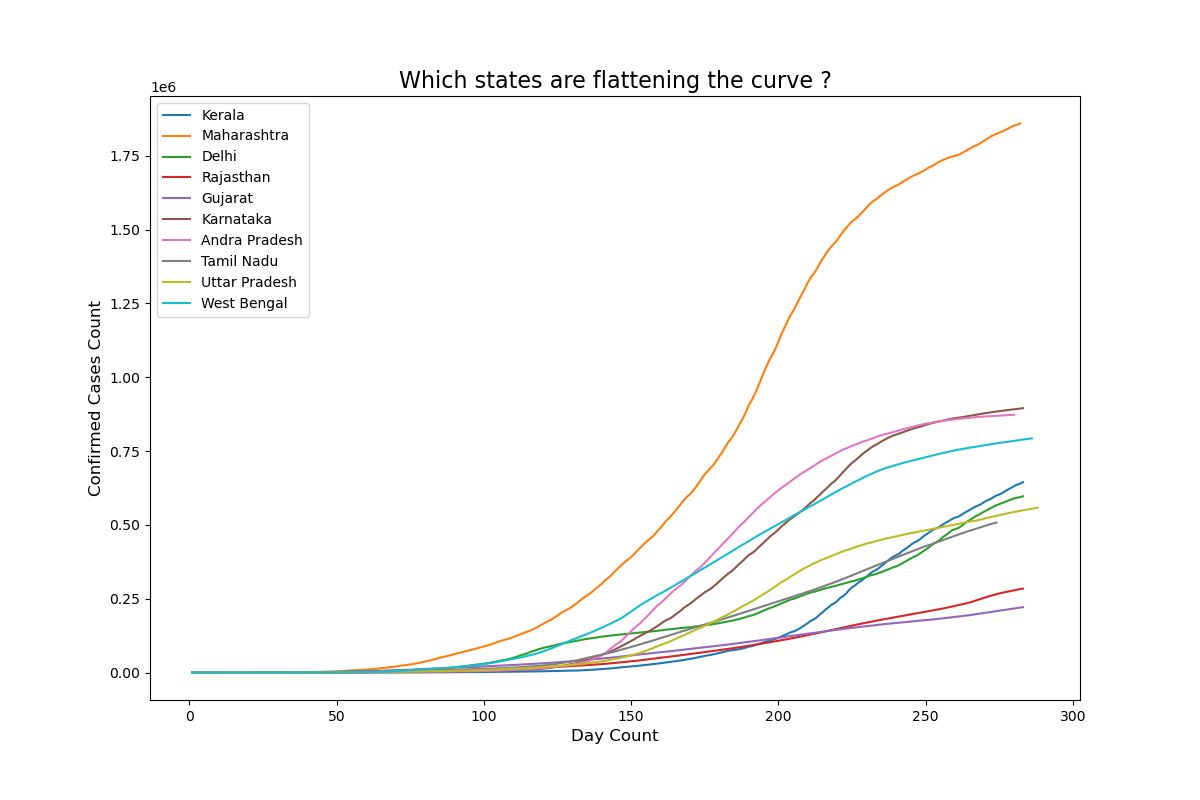

In [48]:
plt.figure(figsize=(12,8), dpi=80)
plt.plot(datac_kerala['Day Count'], datac_kerala['Confirmed'])
plt.plot(datac_maharashtra['Day Count'], datac_maharashtra['Confirmed'])
plt.plot(datac_delhi['Day Count'], datac_delhi['Confirmed'])
plt.plot(datac_rajasthan['Day Count'], datac_rajasthan['Confirmed'])
plt.plot(datac_gujarat['Day Count'], datac_gujarat['Confirmed'])
plt.plot(datac_karnataka['Day Count'], datac_karnataka['Confirmed'])
plt.plot(datac_ap['Day Count'], datac_ap['Confirmed'])
plt.plot(datac_wb['Day Count'], datac_wb['Confirmed'])
plt.plot(datac_up['Day Count'], datac_up['Confirmed'])
plt.plot(datac_tn['Day Count'], datac_tn['Confirmed'])
plt.legend(['Kerala', 'Maharashtra', 'Delhi', 'Rajasthan', 'Gujarat', 'Karnataka', 'Andra Pradesh', 
            'Tamil Nadu', 'Uttar Pradesh', 'West Bengal'], loc='upper left')
plt.xlabel('Day Count', size=12)
plt.ylabel('Confirmed Cases Count', size=12)
plt.title('Which states are flattening the curve ?', size = 16)
plt.show()

We get all the curves of the states which shows us the proper variations. Here Gujarat's curse is having gradual differnet inclination in the period after 200 days as seen in other curves.
But the situation in Maharashtra looks very grave indeed. The curve has had an immense steep incline and shows no signs of slowing down. In Kerela sudddenly cases increased after 150 days. 

Only way to get out of this difficuit situation by flattening the curve. All state governments need to follow the state model to flatten the curve. Gujarat is the only state which managed to flatten the curve and hence, must have done most things right. It’s time we followed the Gujarat model.